<a href="https://colab.research.google.com/github/ParasNandwani/MLmodels/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree On Titanic dataset

Table Of Contents:-       
1. Problem Statement.   
2. Data Loading and Description.   
3. PreProcessing.    
4. Decision Tree
  - 4.1 Introduction Of Decision Tree
  - 4.2 Important Terminology related to Decision Trees
  - 4.3 Types Of Decision Trees





### 1. Problem Statement.   
The goal is to **predict survival** of passengers travelling in RMS **Titanic** using **Logistic Regression**

## Data Loading and Description.      
Importing Packages

In [0]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
%matplotlib inline
sns.set()

from subprocess import check_output


In [0]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")

In [0]:
  titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Preprocessing the data.      
-  Dealing with missing values
    - Dropping/Replacing missing entries of **Embarked**
    - Replacing missing values of **Age** with median values.
    - Dropping the column  **'Cabin'** as it has too many values
    - Replacing 0 values of fare with median values
    

In [0]:
# fillig with mode values
titanic_data.Embarked=titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])


In [0]:
median_age=titanic_data.Age.median()
titanic_data.Age.fillna(median_age,inplace=True)

In [0]:
#  Droping column
titanic_data.drop('Cabin',axis=1,inplace=True)

In [0]:
titanic_data['Fare']=titanic_data.Fare.replace(0,titanic_data['Fare'].median())

## Creating  a new feature named FamilySize

In [0]:
titanic_data['FamilySize']=titanic_data['SibSp']+titanic_data['Parch']+1

In [0]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


## Segmenting Sex column as per Age,Age less than 15 as child ,Age greater than 15 as Males and Females as per their gender 

In [0]:
titanic_data['GenderClass']=titanic_data.apply(lambda x:'child' if x['Age']<15 else x['Sex'],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [0]:
titanic_data[titanic_data['Age']<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


## Dummification of GenderClass & Embarked

In [0]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

In [0]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,1,0,0,0


## Dropping Columns 'Name','Ticket','Sex','Sibsp' and 'Parch','PassengerId'

In [0]:
titanic=titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch','PassengerId'],axis=1)

In [0]:
titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


## Drawing pair plot to know joint relationship between 'Fare','Age','PClass' adnd 'Survived'

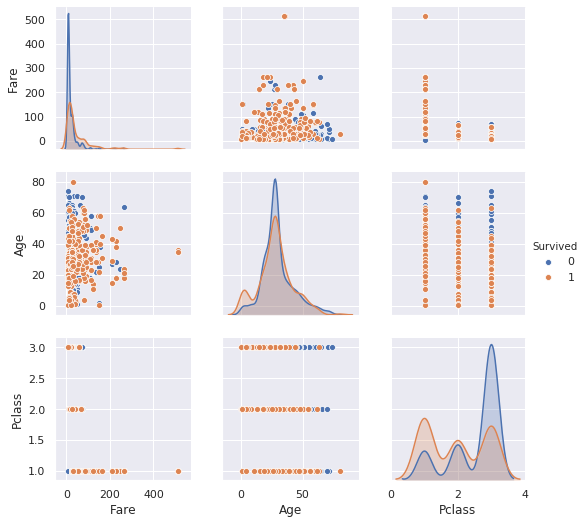

In [0]:
sns.pairplot(titanic[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'],hue='Survived')

Establishing  coorelation between all the features using heatmap

Text(0.5, 1, 'Correlation between features')

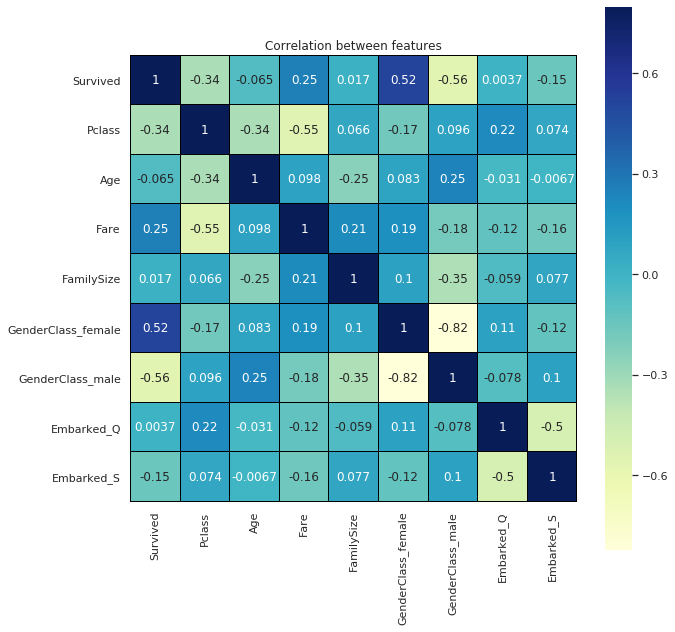

In [0]:
import matplotlib.pyplot as plt
corr=titanic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=0.1,square=True,annot=True,cmap='YlGnBu',linecolor='black')
plt.title("Correlation between features")

# Decision Tree.      

A decision tree is one of the most widely used superviesd learning algorithm that can perform both **both regression and classification tasks**.    
The intution behind the decision tree algorithm is simple yet powerful.    
- A decision tree splits the data into multiple sets. Then each of these sets is further split into subsets to arrive at decision.
- It is a very natural decision making process asking a series of questions in a nested if then else statement.
- On each node we ask a question to further skip the data held by the node.   
The structure of decision tree resembles an upside down tree. with its root at top and branches at bottom.     
Decision tree is a type of **Supervised Learning Algorithm**(having a pre-defined target variable) that is mostly used in classification problems.    - It works for both **catagorical and continous** input and output variables.    
- In this technique, we split the population or sample into two or more homogeneous sets (or sub populations) based on most signnificant splitter/differentiator in input variables.


## Important terminology related to Decision Trees
- **Root Node**.    
 It represents entire population or sample and this further get divided into two or more homogenous sets.      
- **Splitting**.   
It is process of dividing a node into two or more sub nodes.       
- **Decision Node**.    
When a sub node  further splits into further sub-nodes, then it is called Decision Node.    
- **Leaf/Terminal Node**.     
Nodes do not split is called Leaf Node/terminal Node.
- **Prunning**.   
When we remove sub-nodes of decision node,this process is called Pruning.Opposite process of splitting.
- **Branch / sub-tree**.    
A subsection of entire tree is called as Branch/sub-tree
-  **Parent and Child node**.  
A node which is divided into sub-nodes is called as Parent node of sub nodes where as the sub-nodes are the childof parent node.

# Types of Decision Trees.      
Type of decision tree is based on the type of Target Variable we have.It can be of two types:     
- **Catagorical variable Decision Tree**.      
-- Decision trees which has 
- **Continous variable Decision Tree**